# 📊 Sales Marketing Campaign Impact EDA

This notebook will guide you step by step through a **Sales Data analysis** to evaluate the effect of a marketing campaign.

We will:
1. Load the dataset
2. Explore the dataset
3. Perform Exploratory Data Analysis (EDA)
4. Draw a business conclusion
---

### Step 1 : Load the dataset

In [6]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [7]:
# 📌 Step 2: Load the dataset
df = pd.read_csv("C:\\Users\\Debarghya\\Data-Projects\\Machine Learning & Python Projects\\sales_data_with_marketing_intervention.csv")
df.head()

,Unnamed: 0,date,customer_id,product_id,quantity,unit_price,revenue,marketing_campaign
0,0,2021-01-01,372,58,4,42.01,168.04,False
1,1,2021-01-02,288,61,1,74.71,74.71,False
2,2,2021-01-03,130,24,3,36.74,110.22,False
3,3,2021-01-04,175,20,3,60.98,182.94,False
4,4,2021-01-05,462,37,2,52.84,105.68,False


### 🔍 Step 2: Explore the dataset
👉 *Which product generates highest revenues?*

👉 *Who are the best customers?*

👉 *What is the best time of the year of sales?*

#### a. Which product generates highest revenues?

In [8]:
# Grouping by product id and sum of revenue of each product group
product_revenue = df.groupby('product_id')['revenue'].sum()
#Product id and highest revenue
top_product_id = product_revenue.idxmax()
top_revenue = product_revenue.max()

print(f"product {top_product_id} generates highest revenue: {top_revenue}")

product 66 generates highest revenue: 2877.16


#### b. Who are the best customers?

In [9]:
# Group by customer_id and sum the revenue for each customer group
customer_revenue = df.groupby('customer_id')['revenue'].sum()

# Sort customers by total revenue in descending order
best_customers = customer_revenue.sort_values(ascending=False)

print(best_customers.head())  # Top customers by revenue

customer_id
459    1719.14
25     1572.96
391    1396.36
392    1390.48
309    1351.69
Name: revenue, dtype: float64


#### c. What is the best time of the year of sales?

In [10]:
# Convert 'date' column to datetime (if not already)
df['date'] = pd.to_datetime(df['date'])

# Extract month number (1 to 12) or month name if preferred
#df['month'] = df['date'].dt.month  # For month number
df['month_name'] = df['date'].dt.month_name()  # For month name

# Group by month and sum revenue
monthly_revenue = df.groupby('month_name')['revenue'].sum()

# Find the month with highest sales
best_month = monthly_revenue.idxmax()
best_month_sales = monthly_revenue.max()

print(f"Month {best_month} has the highest sales: {best_month_sales}")

Month August has the highest sales: 21736.48


### 📊 Step 3: Exploratory Data Analysis (EDA)



#### a. Marketing campaign insights: We will visualize the difference between campaign and non-campaign groups.

In [11]:
# Summary statistics grouped by campaign
df.groupby("marketing_campaign")["revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
marketing_campaign,,,,,,,,
False,200.0,163.4612,129.122193,0.00,59.775,134.92,236.035,569.88
True,50.0,747.9458,374.462218,137.41,454.090,797.64,1025.250,1572.96


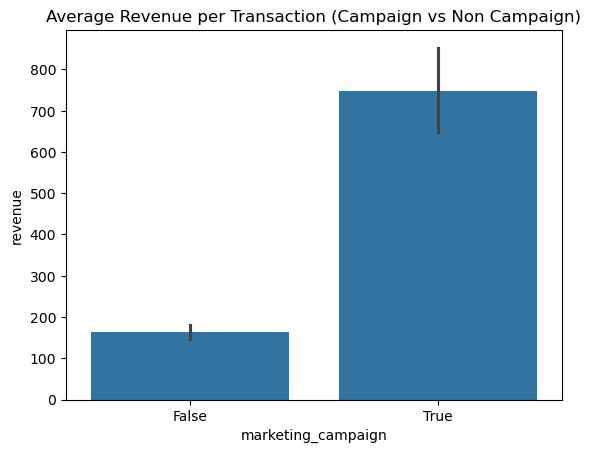

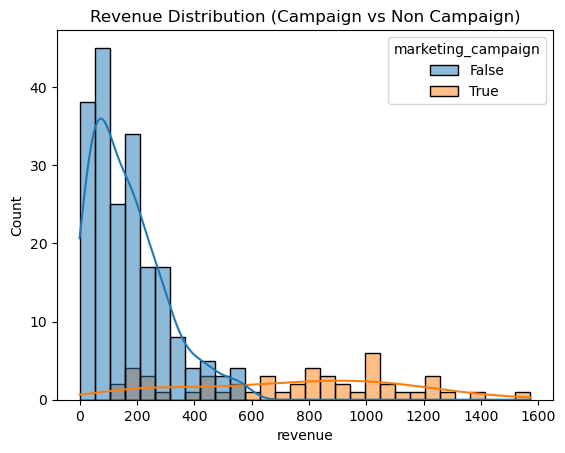

In [12]:
# Average revenue per transaction
sns.barplot(x="marketing_campaign", y="revenue", data=df, estimator=np.mean)
plt.title("Average Revenue per Transaction (Campaign vs Non Campaign)")
plt.show()

# Revenue distribution
sns.histplot(data=df, x="revenue", hue="marketing_campaign", kde=True, bins=30)
plt.title("Revenue Distribution (Campaign vs Non Campaign)")
plt.show()

### These graphs clearly shows that marketing campaign increased revenue and without marketing campaign revenue is very low. The campaign is needed to improve the sales.

### b. Sales trend Analysis

C:\Users\Debarghya\AppData\Local\Temp\ipykernel_1172\3300756399.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['revenue'].resample('M').sum()


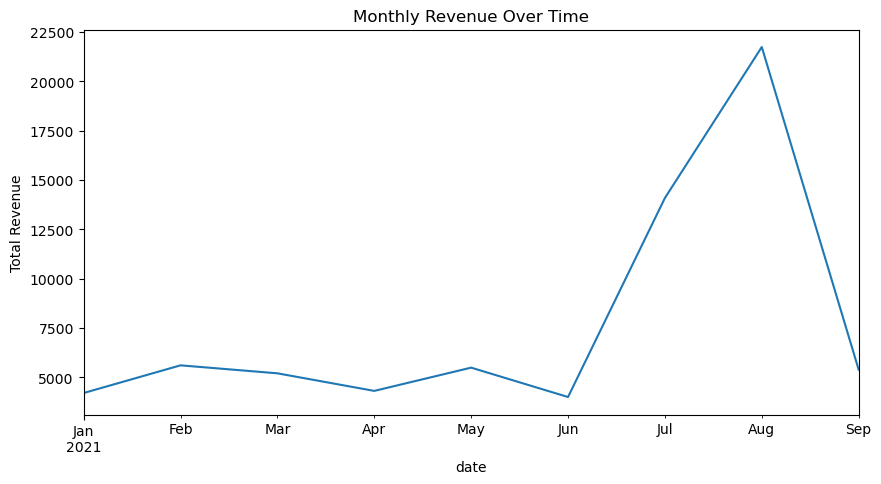

In [13]:
# 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Set date as index for resampling
df.set_index('date', inplace=True)

# Daily revenue, groups by day
daily_revenue = df['revenue'].resample('D').sum()

# Weekly revenue, groups by week
weekly_revenue = df['revenue'].resample('W').sum()

# Monthly revenue, groups by month
monthly_revenue = df['revenue'].resample('M').sum()

# Example: Plot monthly revenue
plt.figure(figsize=(10, 5))
monthly_revenue.plot(title='Monthly Revenue Over Time')
plt.ylabel('Total Revenue')
plt.show()

### The revenue trend shows that revenue started increasing from the month of June to Aug and Aug has the highest sales. However the sales have been dropped in the month of September.

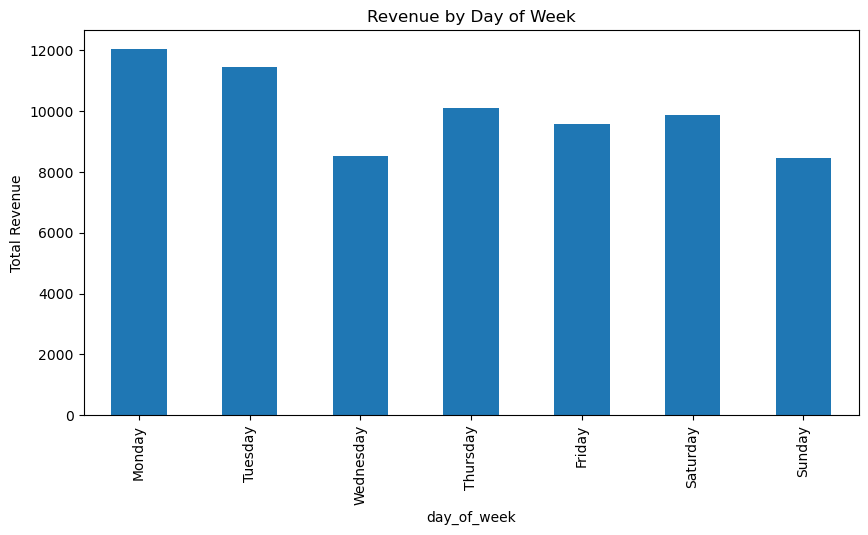

In [14]:
# Reset index (to access date columns)
df.reset_index(inplace=True)

# Extract useful features from date
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.day_name()

# Aggregate revenue by month, week, day of week
monthly_pattern = df.groupby('month')['revenue'].sum()
weekly_pattern = df.groupby('week')['revenue'].sum()
dayofweek_pattern = df.groupby('day_of_week')['revenue'].sum()

# Order the day of week for plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_pattern = dayofweek_pattern.reindex(ordered_days)

# Plot day of week pattern
plt.figure(figsize=(10, 5))
dayofweek_pattern.plot(kind='bar', title='Revenue by Day of Week')
plt.ylabel('Total Revenue')
plt.show()


### Early weekdays, especially Monday and Tuesday, are the most profitable for sales. These could be the targeted marketing campaign dates.

### c. Customer Segmentation

#### Which customers (customer_id) purchase the most?

In [21]:
customer_revenue = df.groupby('customer_id')['revenue'].sum()
Top_customer = customer_revenue.sort_values(ascending=False)
print(Top_customer.head()) #first 5 top purchasing customers

customer_id
459    1719.14
25     1572.96
391    1396.36
392    1390.48
309    1351.69
Name: revenue, dtype: float64


##### Customer with customer_id 459 generates the highest revenue.

#### Are there patterns in customer purchasing behavior linked to marketing campaigns?

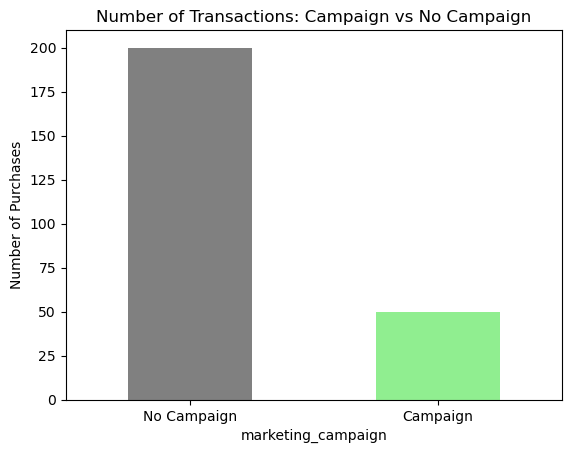

In [27]:
#Compare Total Purchases under Campaign vs No Campaign
purchase_counts = df['marketing_campaign'].value_counts() # Count of transactions with and without marketing campaign
purchase_counts.plot(kind='bar', color=['grey', 'lightgreen'])
plt.title('Number of Transactions: Campaign vs No Campaign')
plt.ylabel('Number of Purchases')
plt.xticks([0,1], ['No Campaign', 'Campaign'], rotation=0)
plt.show()

#### The above graph shows that the business generates significantly more transactions when no marketing campaign is active. This suggests that regular sales already perform well, or that campaigns are infrequent or narrowly targeted.

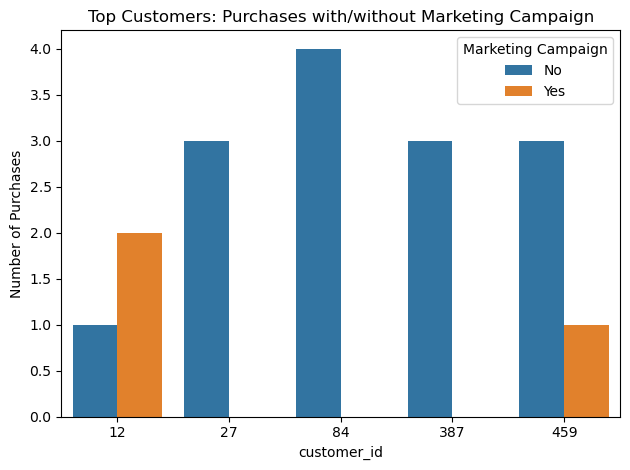

In [29]:
top_customers = df['customer_id'].value_counts().head(5).index
subset = df[df['customer_id'].isin(top_customers)]

# Plot for each customer: transactions with/without campaign
import seaborn as sns
sns.countplot(data=subset, x='customer_id', hue='marketing_campaign')
plt.title('Top Customers: Purchases with/without Marketing Campaign')
plt.ylabel('Number of Purchases')
plt.legend(title='Marketing Campaign', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

#### The graph shows that:
1. Most purchases are made without a marketing campaign. Marketing campaigns do not dramatically increase the number of transactions for top customers.
2. The business could consider personalized campaigns for top customers or analyze if campaigns successfully attract new buyers rather than repeat ones.

#### Overall Conclusion: 
The overall exploratory data analysis suggests that while marketing campaigns may have fewer total transactions (as seen in the previous bar chart), the transactions customers do generate tend to have higher value per sale.

In other words, campaigns might be driving bigger purchases or higher-priced items, even if they don’t increase the number of transactions overall.